In [5]:
import os
from gradio_client import Client, handle_file
from PIL import Image  # Make sure this is imported
import matplotlib.pyplot as plt
import shutil
import string
import random

In [2]:
HF_TOKEN = os.environ.get("HF_TOKEN")

In [3]:

client = Client("suspicious-cow/FLUX.1-dev", hf_token=HF_TOKEN)
result = client.predict(
		prompt="a dog riding on a tiger",
		seed=0,
		randomize_seed=True,
		width=1024,
		height=1024,
		guidance_scale=3.5,
		num_inference_steps=28,
		api_name="/infer"
)
print(result)

Loaded as API: https://suspicious-cow-flux-1-dev.hf.space ✔
('C:\\Users\\Zain_\\AppData\\Local\\Temp\\gradio\\5e56d7a912b7e05b963d2d378f96e800e7eb2fc8428a50649a242d5db49b7353\\image.webp', 152507119)


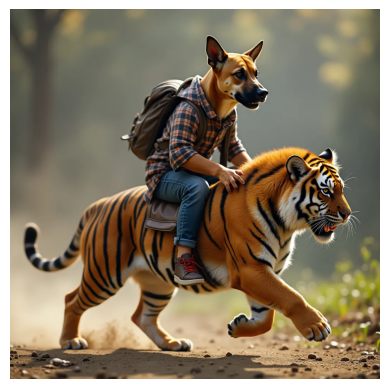

In [6]:
# Extract the image path from the result tuple
image_path = result[0]

# Generate a random string to append to the filename
random_string = ''.join(random.choices(string.ascii_letters + string.digits, k=8))

# Define the new permanent location for the image with the random string
filename = f"generated_image_{random_string}.webp"
permanent_location = os.path.join("./flux1_images", filename)

# Ensure the destination directory exists
os.makedirs("./flux1_images", exist_ok=True)

# Move the image to the new permanent location
shutil.move(image_path, permanent_location)

# Open the image from the new location using PIL
image = Image.open(permanent_location)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()
